In [ ]:
cd

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
patient_data = pd.read_csv("~/Desktop/Datasets/patients.csv")

In [28]:
patient_data.head()

,Age,BMI,Gender,Diabetic
0,25,25.0,Male,No
1,55,31.0,Female,Yes
2,40,28.0,Male,Yes
3,61,24.0,Male,No
4,24,NaN,Female,No


In [29]:
features = patient_data.iloc[:,0:3]

In [30]:
features

,Age,BMI,Gender
0,25,25.0,Male
1,55,31.0,Female
2,40,28.0,Male
3,61,24.0,Male
4,24,NaN,Female
5,35,35.0,Male
6,52,32.0,Male
7,67,26.0,Female
8,44,27.0,Male
9,19,22.0,Female


In [36]:
labels = patient_data.iloc[:,3].values

In [37]:
from sklearn.preprocessing import Imputer 

In [38]:
imputer = Imputer(missing_values="NaN", strategy="mean", axis=0)  
imputer = imputer.fit(features[:,1:2])  
features[:,1:2] = imputer.transform(features[:,1:2])



/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: '(slice(None, None, None), slice(1, 2, None))' is an invalid key

In [39]:
from sklearn.preprocessing import LabelEncoder 

In [40]:
labelencoder_features = LabelEncoder()  
features[:,2]= labelencoder_features.fit_transform(features[:,2])

 

TypeError: '(slice(None, None, None), 2)' is an invalid key

In [41]:
labels = labelencoder_features.fit_transform(lables)

NameError: name 'lables' is not defined

In [42]:
from sklearn.model_selection import train_test_split  



In [43]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 0)

 

 

In [44]:
train_features

,Age,BMI,Gender
10,58,89.0,Female
2,40,28.0,Male
8,44,27.0,Male
1,55,31.0,Female
7,67,26.0,Female
9,19,22.0,Female
3,61,24.0,Male
0,25,25.0,Male
5,35,35.0,Male


In [45]:
test_features

,Age,BMI,Gender
6,52,32.0,Male
11,48,39.0,Male
4,24,NaN,Female


In [46]:
test_labels

array(['Yes', 'Yes', 'No'], dtype=object)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
feature_scaler = StandardScaler()  
train_features = feature_scaler.fit_transform(train_features)  
test_features = feature_scaler.transform(test_features)

ValueError: could not convert string to float: 'Female'

In [49]:
train_features 

,Age,BMI,Gender
10,58,89.0,Female
2,40,28.0,Male
8,44,27.0,Male
1,55,31.0,Female
7,67,26.0,Female
9,19,22.0,Female
3,61,24.0,Male
0,25,25.0,Male
5,35,35.0,Male


In [50]:
car_data = pd.read_csv("Desktop/Datasets/car_price.csv")

In [51]:
%matplotlib inline

In [52]:
car_data.head()

,Year,Price
0,1980,2000
1,1985,3000
2,1983,2200
3,1990,3700
4,1995,4500


In [53]:
car_data.describe()

,Year,Price
count,20.000000,20.000000
mean,1992.100000,4302.500000
std,7.319045,1458.592959
min,1980.000000,2000.000000
25%,1986.500000,3075.000000
50%,1992.500000,4350.000000
75%,1998.250000,5325.000000
max,2005.000000,7000.000000


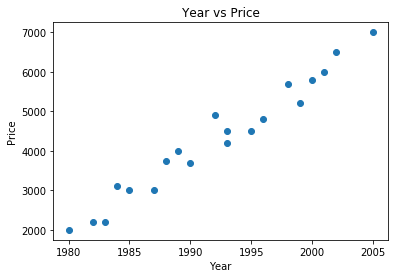

In [54]:
plt.scatter(car_data['Year'], car_data['Price'])
plt.title("Year vs Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


In [55]:
features= car_data.iloc[:,0:1].values  
labels= car_data.iloc[:,1].values

 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 0)


In [58]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
print(lin_reg.coef_)

[204.8158111]


In [60]:
predictions = lin_reg.predict(test_features)

In [61]:
predictions

array([5689.1728312 , 2821.75147575, 2616.93566465, 3641.01472017])

In [62]:
comparison = pd.DataFrame({'Real':test_labels,'Predictions':predictions})

In [63]:
print(comparison)

   Real  Predictions
0  5200  5689.172831
1  3000  2821.751476
2  3100  2616.935665
3  4000  3641.014720


In [ ]:
from sklearn import metrics 

In [ ]:
print('MAE:', metrics.mean_absolute_error(test_labels, predictions))
print('MSE:', metrics.mean_squared_error(test_labels, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

In [ ]:
player_data = pd.read_csv("Desktop/Datasets/player.csv")

In [ ]:
player_data.head()

In [ ]:
player_data.describe()

In [ ]:
features = player_data[['Height','Weight','Field_Goals','Throws']]
labels = player_data['Points'] 

In [ ]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [ ]:
feature_scaler = StandardScaler()
train_features = feature_scaler.fit_transform(train_features) 
test_features = feature_scaler.transform(test_features) 

In [ ]:
train_features

In [ ]:
test_features

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

In [ ]:
print(lin_reg)

In [ ]:
coefficients= pd.DataFrame(lin_reg.coef_,features.columns,columns=['Coefficients']) 

In [ ]:
print(coefficients)

In [ ]:
predictions = lin_reg.predict(test_features)
print(predictions)
comparison = pd.DataFrame({'Real':test_labels, 'Predictions':predictions})
print(comparison)

from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(test_labels, predictions)) 
print('MSE:', metrics.mean_squared_error(test_labels, predictions))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

In [ ]:
RMSE and MAE are 4.65 and 5.67 which is greater than 10% of the mean value which is 1.179

In [ ]:
petrol_data = pd.read_csv("Desktop/Datasets/petrol_data.csv")

In [ ]:
petrol_data.head()

In [ ]:
petrol_data.describe()

In [ ]:
features = petrol_data[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)", "Petrol_Consumption"]]

In [ ]:
labels = petrol_data['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg_feat = PolynomialFeatures(degree=2)
train_features_poly = poly_reg_feat.fit_transform(train_features)
test_features_poly = poly_reg_feat.transform(test_features)

In [ ]:
train_features_poly

In [ ]:
test_features_poly

In [ ]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
train_features_poly = feature_scaler.fit_transform(train_features_poly)
test_features_poly = feature_scaler.transform(test_features_poly)

In [ ]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_features_poly, train_labels)

In [ ]:
predictions = lin_reg.predict(test_features_poly)

In [ ]:
comparison=pd.DataFrame({'Real':test_labels, 'Predictions':predictions})

In [ ]:
print(comparison)